<a href="https://colab.research.google.com/github/hamzaktk18/stats/blob/main/Statitical_significance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('rstatix')
install.packages('ggpubr')
install.packages('xlsx')
install.packages('coin')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’




In [ ]:
# required libraries for graphics and statistical analysis
library(tidyverse)
library(rstatix)
library(ggpubr)
library(xlsx)

In [ ]:
# Load and inspect the data
my_data <- read.xlsx("dataR-combined.xlsx", 1)
head(data, 3)

,group,amount
,<chr>,<dbl>
1,logo,40000
2,logo,30000
3,logo,10400


In [ ]:
# Load and inspect the data
columns_data <- read.xlsx("dataR - columns.xlsx", 1)
head(data, 3)

,group,amount
,<chr>,<dbl>
1,logo,40000
2,logo,30000
3,logo,10400


In [ ]:
#visual inspection of dara uploaded
print(my_data)
print(columns_data)

In [ ]:
# getting the count, mean, standard dev., median, and Interquartile range 
library(dplyr)
group_by(my_data, group) %>%
  summarise(
    count = n(),
    mean = mean(amount, na.rm = TRUE),
    sd = sd(amount, na.rm = TRUE),
    median = median(amount, na.rm = TRUE),
    IQR = IQR(amount, na.rm = TRUE)
  )

,group,count,mean,sd,median,IQR
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,logo,857,281.0512,1847.169,50,75
2,nol,413,353.6889,1684.156,100,150


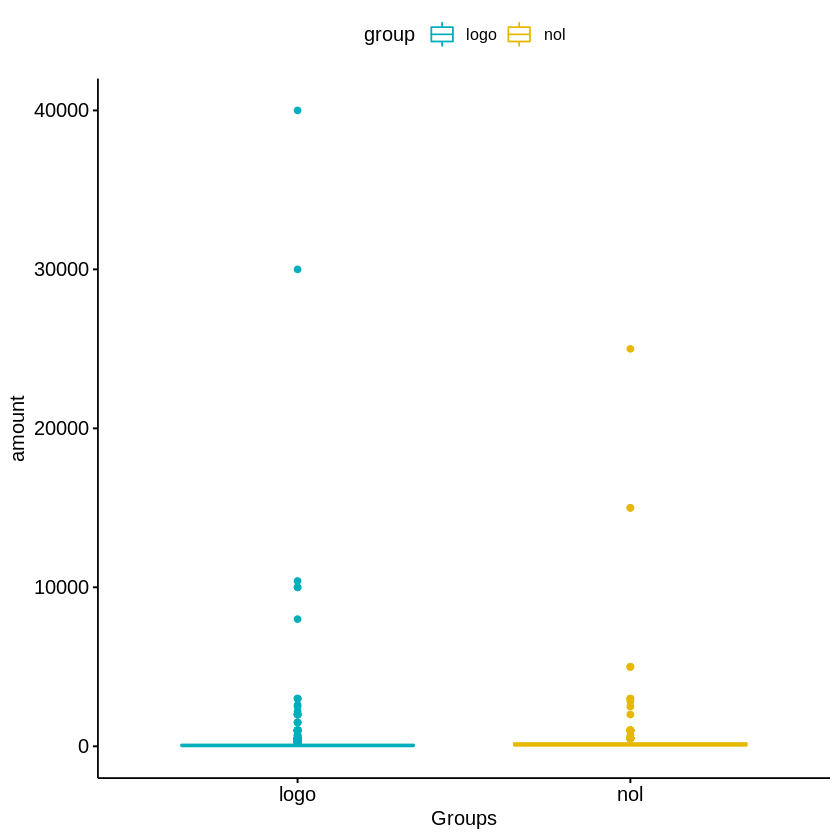

In [ ]:
#plotting to check values 
#outliers identified 
library("ggpubr")
ggboxplot(my_data, x = "group", y = "amount", 
          color = "group", palette = c("#00AFBB", "#E7B800"),
        ylab = "amount", xlab = "Groups")

In [ ]:
# Shapiro-Wilk normality test for logo
with(my_data, shapiro.test(amount[group == "logo"]))# p = 0.1
# Shapiro-Wilk normality test for nol
with(my_data, shapiro.test(amount[group == "nol"])) # p = 0.6


	Shapiro-Wilk normality test

data:  amount[group == "logo"]
W = 0.096921, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  amount[group == "nol"]
W = 0.15872, p-value < 2.2e-16


In [ ]:
#columns to variables
x = columns_data$logo
y = columns_data$nol

In [ ]:
head(y, 3)

[1] 25000 15000 15000

In [ ]:
#Wilcox testing 
res <- wilcox.test(x, y)
res


	Wilcoxon rank sum test with continuity correction

data:  x and y
W = 148073, p-value = 1.724e-06
alternative hypothesis: true location shift is not equal to 0


In [ ]:
res1 <- wilcox.test(amount ~ group, data = my_data,
                   exact = FALSE)
res1


	Wilcoxon rank sum test with continuity correction

data:  amount by group
W = 148073, p-value = 1.724e-06
alternative hypothesis: true location shift is not equal to 0


In [ ]:
# Print the p-value only
res$p.value

[1] 1.72406e-06

our P value is 0.00000172406, which is less than our alpha = 0.05 threshold. Reject Null hypothesis.

In [ ]:
wilcox.test(amount ~ group, data = my_data, 
        exact = FALSE, alternative = "less")


	Wilcoxon rank sum test with continuity correction

data:  amount by group
W = 148073, p-value = 8.62e-07
alternative hypothesis: true location shift is less than 0


if you want to test your dataset please visit this online calculator: http://www.sthda.com/english/rsthda/unpaired-wilcoxon.php (independent 2 sample Wilcoxon test)
When do we use Wilcoxon test? 
- Monday to Friday 11am to 4pm, jk:
  - The Wilcoxon rank-sum test is commonly used for the comparison of two groups of nonparametric (interval or not normally distributed) data, such as those which are not measured exactly but rather as falling within certain limits.